# Predicting Energy based on some parameter

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Global_Data.csv')

In [3]:
corr_matrix = df.corr()

In [4]:
start_date = '02-01-2018'
end_date = '29-07-2022'

start_date = pd.to_datetime(start_date, format='%d-%m-%Y')
end_date = pd.to_datetime(end_date, format='%d-%m-%Y')

In [5]:
len(df)

1612

In [9]:
date_range = pd.date_range(start=start_date,periods=len(df),  freq='D')

In [10]:
df.insert(0, 'Date', date_range)

In [11]:
df_filled = df.interpolate()

In [51]:
df_filled.apply(pd.isnull).sum()

BTC           0
ETH           0
USDT          0
XRP           0
USA           0
CAN           0
UK            0
FRANCE        0
SWISS         0
GERM          0
BRAZIL        0
MEX           0
CHILE         0
PERU          0
COLOMBIA      0
SAUDI         0
SAFRICA       0
UAE           0
QATAR         0
KUWAIT        0
JAPAN         0
CHINA         0
AUSTRALIA     0
TAIWAN        0
KOREA         0
REIT          0
DXY           1
ENERGY        1
AGRI          1
PRECIOUS      1
INDUSTRIAL    1
SUKUK         1
SUSTAIN       1
GREENB        1
dtype: int64

In [13]:
df_filled.head()

,Date,BTC,ETH,USDT,XRP,USA,CAN,UK,FRANCE,SWISS,...,KOREA,REIT,DXY,ENERGY,AGRI,PRECIOUS,INDUSTRIAL,SUKUK,SUSTAIN,GREENB
0,2018-01-02,13444.900000,752.46,1.010000,2.050000,2544.580,1791.593,1255.807,1939.395,5503.285,...,554.164,1588.421373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,14754.100000,858.78,1.020000,2.190000,2565.608,1807.276,1254.183,1938.353,5516.304,...,561.255,1581.589857,91.872,210.06,284.50,1725.27,393.92,127.32,1526.41,138.02
2,2018-01-04,15156.600000,942.01,1.010000,2.730000,2582.160,1811.935,1251.570,1949.120,5538.526,...,562.856,1582.679676,92.162,213.70,285.10,1728.73,389.68,127.44,1533.04,138.09
3,2018-01-05,15180.100000,940.00,1.020000,2.730000,2592.489,1820.338,1259.210,1985.510,5569.269,...,559.932,1561.484702,91.853,214.02,284.69,1732.38,392.93,127.78,1549.34,138.44
4,2018-01-06,15529.466667,998.60,1.012333,2.746667,2610.524,1833.096,1264.804,1999.127,5597.080,...,568.514,1564.553810,91.949,212.03,283.47,1733.37,387.82,127.74,1561.40,138.24


In [15]:
column_names = df_filled.columns

In [16]:
column_names

Index(['Date', 'BTC', 'ETH', 'USDT', 'XRP', 'USA', 'CAN', 'UK', 'FRANCE',
       'SWISS', 'GERM', 'BRAZIL', 'MEX', 'CHILE', 'PERU', 'COLOMBIA', 'SAUDI',
       'SAFRICA', 'UAE', 'QATAR', 'KUWAIT', 'JAPAN', 'CHINA', 'AUSTRALIA',
       'TAIWAN', 'KOREA', 'REIT', 'DXY', 'ENERGY', 'AGRI', 'PRECIOUS',
       'INDUSTRIAL', 'SUKUK', 'SUSTAIN', 'GREENB'],
      dtype='object')

In [30]:
df= df_filled

In [34]:
energy = df['ENERGY']


In [53]:
energy.dropna()

Date
2018-01-03    210.060000
2018-01-04    213.700000
2018-01-05    214.020000
2018-01-06    212.030000
2018-01-07    212.183333
                 ...    
2022-05-28    405.330000
2022-05-29    405.325000
2022-05-30    405.320000
2022-05-31    405.315000
2022-06-01    405.310000
Name: ENERGY, Length: 1611, dtype: float64

<Axes: xlabel='Date'>

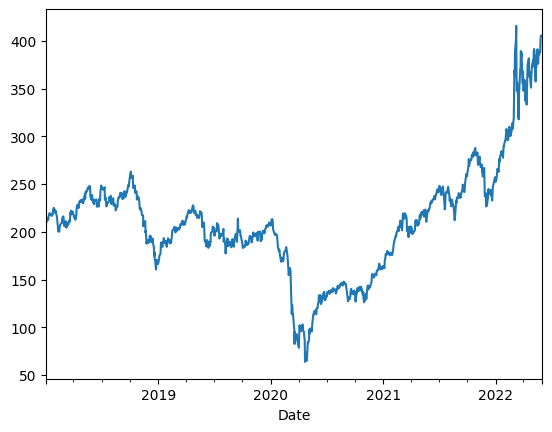

In [54]:
energy.plot()

In [55]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()

    X = []
    y = []

    for i in range(len(df_as_np) - window_size ):
        row = [[a] for a in df_as_np[i:i+5]]

        X.append(row)
        label = df_as_np[i+5]
        y.append(label)

    return np.array(X), np.array(y)

In [56]:
WINDOW_SIZE = 5

X, y = df_to_X_y(energy, WINDOW_SIZE)

X.shape, y.shape

((1607, 5, 1), (1607,))

In [57]:
X_train, y_train = X[:1200], y[:1200]
X_val, y_val = X[1200:1400], y[1200:1400]
X_test, y_test = X[1400:], y[1400:]

In [58]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1200, 5, 1), (1200,), (200, 5, 1), (200,), (207, 5, 1), (207,))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * #Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [59]:
model1 = Sequential()

model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [60]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [61]:
model1.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=10, callbacks=[cp])

Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 7/10
38/38 [==============================] -